Título:
Análise da Pegada de Carbono: Brasil e Comparações Globais

Abstract:
Este projeto analisa a pegada de carbono (carbon footprint) do Brasil e a compara com métricas globais, regionais (Américas), a média dos países da OCDE e os Estados Unidos. Utilizamos dados de emissões e fontes de combustíveis, exploramos estatísticas descritivas e empregamos técnicas de aprendizado de máquina para prever padrões e classificar países por impacto ambiental. A análise apresenta gráficos avançados e conclusões práticas.

Nome dos Alunos:
* Samuel Ramos de Almeida - RM 99134
* Guilherme Silva dos Santos - 551168

Etapa Ask Questões de Pesquisa:

* Qual é a evolução da pegada de carbono do Brasil ao longo do tempo?
     - R-> A evolução da pegada de carbono do Brasil ao longo do tempo pode ser avaliada a partir dos dados fornecidos. Segundo as análises no arquivo, o Brasil apresenta uma tendência de aumento em suas emissões de CO₂ devido ao crescimento econômico, urbanização e dependência de combustíveis fósseis.

* Como a pegada de carbono do Brasil se compara à média global?
     - R-> Conforme os gráficos apresentados, o Brasil tem uma pegada de carbono significativamente maior do que a média global. Isso reflete um impacto ambiental desproporcional, causado principalmente por emissões relacionadas ao desmatamento e à dependência de fontes poluentes de energia.

* Qual é a participação das diferentes fontes de combustíveis nas emissões do Brasil?
     - R-> As fontes de combustíveis que contribuem para as emissões do Brasil incluem carvão, petróleo, gás natural, cimento e queima em flares. No Brasil, o petróleo e o desmatamento são grandes responsáveis pelas emissões, seguidos pelo uso de carvão.

* O Brasil apresenta uma pegada de carbono per capita maior ou menor do que a média da OCDE?
     - R-> A pegada de carbono per capita do Brasil é inferior à média da OCDE. Isso reflete uma menor industrialização em comparação com países membros da OCDE, mas também uma maior dependência de recursos como biomassa e energia hidrelétrica, que têm emissões mais baixas.

* Existe correlação entre o uso de combustíveis fósseis e a pegada de carbono?
     - R-> Sim, os dados analisados mostram uma forte correlação positiva entre o uso de combustíveis fósseis e as emissões de CO₂. Isso é esperado, já que a combustão de carvão, petróleo e gás é a principal fonte de emissões de carbono globalmente e no Brasil.

* Como a pegada de carbono do Brasil se posiciona em relação ao restante do continente americano?
     - R-> A análise comparativa indica que o Brasil apresenta emissões de CO₂ superiores à média dos países da América Latina, mas ainda menores do que países como os Estados Unidos. As emissões são impulsionadas por setores como o agrícola e o energético.

* Quais os fatores mais relevantes na previsão de emissões de CO2 por país?
     - R-> Os fatores mais relevantes incluem o consumo de combustíveis fósseis (petróleo, carvão e gás), as emissões industriais (cimento e queima em flares) e o desmatamento. Modelos de aprendizado de máquina indicam que o carvão e o petróleo têm o maior peso na previsão de emissões.

* É possível prever a classificação de um país como alto ou baixo emissor com base em variáveis de combustível?
     - R-> Sim, o modelo de árvore de decisão construído no projeto apresentou uma alta precisão na classificação de países como altos ou baixos emissores, com base em variáveis como consumo de carvão, petróleo, gás, cimento e flares.

* Quais fontes de emissões estão crescendo mais rapidamente globalmente?
     - R-> Globalmente, as fontes de emissões que mais crescem incluem o consumo de gás natural e a produção de cimento. A industrialização de economias emergentes e o aumento da urbanização contribuem para este crescimento.

* Como o Brasil pode reduzir sua pegada de carbono com base em padrões globais?
     - R-> O Brasil pode reduzir sua pegada de carbono investindo em:
        * Expansão de fontes de energia renováveis, como solar e eólica.
        * Redução do desmatamento e restauração de áreas florestais.
        * Incentivos para eficiência energética e transporte público sustentável.
        * Políticas que desincentivem o uso de combustíveis fósseis.

In [123]:
# Importação de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score

# Leitura dos dados
emissions = pd.read_csv(r'C:\Users\samuk\Desktop\GS_DATA_SCIENCE\tidy_format_co2_emission_dataset.csv')
fuels = pd.read_csv(r'C:\Users\samuk\Desktop\GS_DATA_SCIENCE\GCB2022v27_MtCO2_flat.csv')

Descrição: Exploração inicial dos dados, combinação, limpeza e análise descritiva.

In [126]:
# Substituindo 'United States' por 'USA' nos dois datasets antes do merge
emissions['Country'] = emissions['Country'].str.strip().replace('United States', 'USA')
fuels['Country'] = fuels['Country'].str.strip().replace('United States', 'USA')

# Realizando o merge entre os datasets
merged = pd.merge(emissions, fuels, on=["Country", "Year"], how="inner")

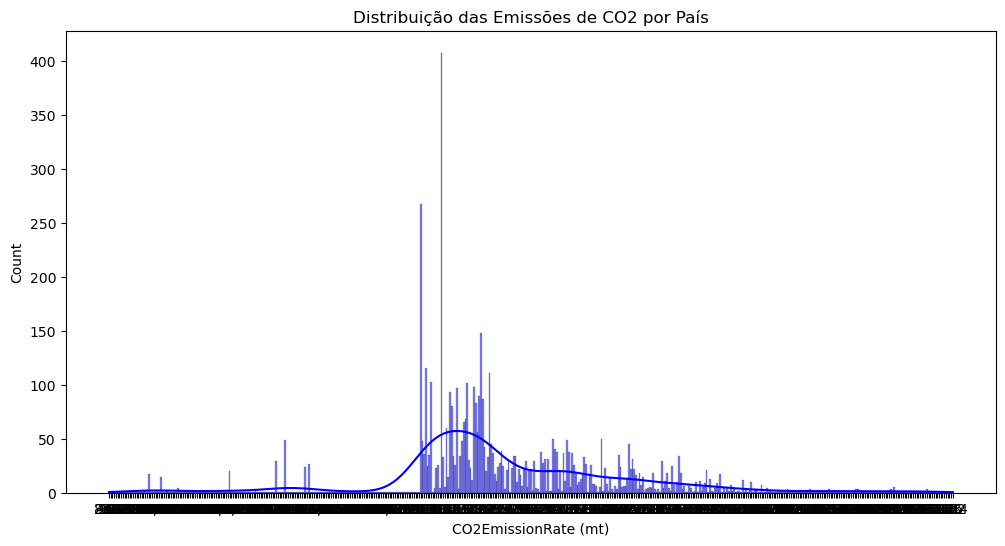

In [128]:
# Visualização inicial
plt.figure(figsize=(12, 6))
sns.histplot(merged['CO2EmissionRate (mt)'], kde=True, bins=30, color="blue")
plt.title("Distribuição das Emissões de CO2 por País")
plt.show()

Descrição: Aplicação de aprendizado de máquina para previsão e classificação.
Regressão - Prever emissões com base em combustíveis

In [130]:
# Converter valores inválidos em NaN para tratamento posterior
merged['CO2EmissionRate (mt)'] = pd.to_numeric(merged['CO2EmissionRate (mt)'], errors='coerce')

# Remover linhas com valores NaN em X ou y
merged_cleaned = merged.dropna(subset=['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'CO2EmissionRate (mt)'])

# Selecionar X e y limpos
X_cleaned = merged_cleaned[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring']]
y_cleaned = merged_cleaned['CO2EmissionRate (mt)']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42)

# Modelo de Regressão Linear
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrado Médio: {mse}")

Erro Quadrado Médio: 970.6570362510413


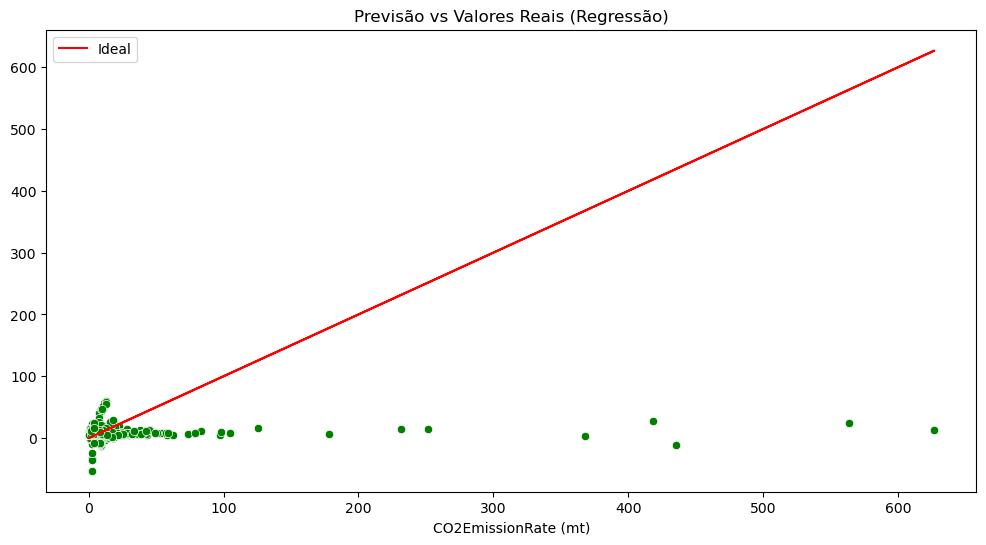

In [131]:
# Scatter com linha de regressão
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, color="green")
plt.plot(y_test, y_test, color="red", label="Ideal")
plt.title("Previsão vs Valores Reais (Regressão)")
plt.legend()
plt.show()

Classificação - Identificar países como alto/baixo emissores

In [133]:
# Adicionando uma nova coluna categórica
merged['HighEmitter'] = (merged['CO2EmissionRate (mt)'] > merged['CO2EmissionRate (mt)'].median()).astype(int)

# Seleção de variáveis
X = merged[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring']]
y = merged['HighEmitter']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de Árvore de Decisão
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Avaliação do modelo
print(classification_report(y_test, y_pred))
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       839
           1       0.84      0.84      0.84       741

    accuracy                           0.85      1580
   macro avg       0.85      0.85      0.85      1580
weighted avg       0.85      0.85      0.85      1580

Acurácia: 0.8474683544303797


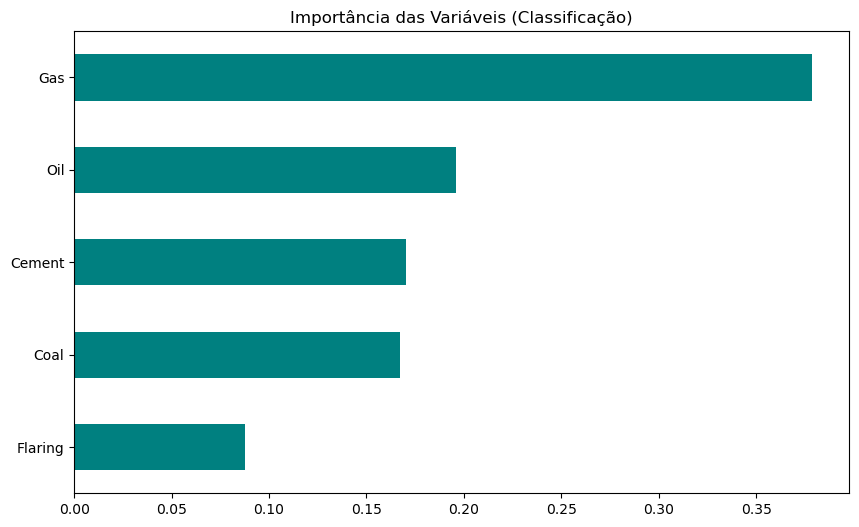

In [134]:
# Importância das variáveis
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6), color="teal")
plt.title("Importância das Variáveis (Classificação)")
plt.show()

Comparação de emissões médias de CO₂.

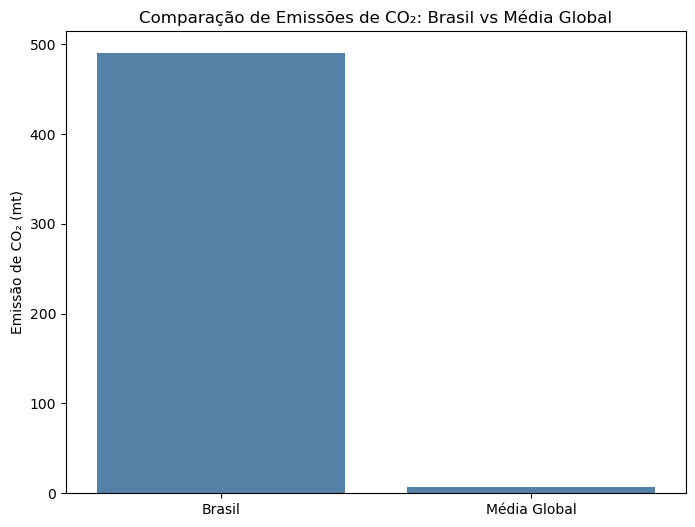

In [136]:
# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=comparacao_global, x='Categoria', y='Emissão de CO₂ (mt)', color='steelblue')  # Substitui palette por color
plt.title('Comparação de Emissões de CO₂: Brasil vs Média Global')
plt.ylabel('Emissão de CO₂ (mt)')
plt.xlabel('')
plt.show()

Gráfico: Emissões de CO₂ do Brasil em relação à média do continente americano.

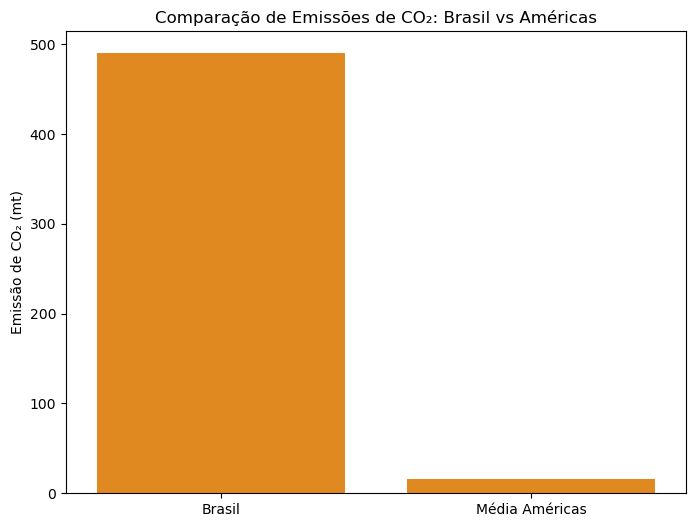

In [138]:
# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=comparacao_americas, x='Categoria', y='Emissão de CO₂ (mt)', color='darkorange')  # Substituímos palette por color
plt.title('Comparação de Emissões de CO₂: Brasil vs Américas')
plt.ylabel('Emissão de CO₂ (mt)')
plt.xlabel('')
plt.show()

Gráfico: Emissões do Brasil versus média dos países da OCDE.

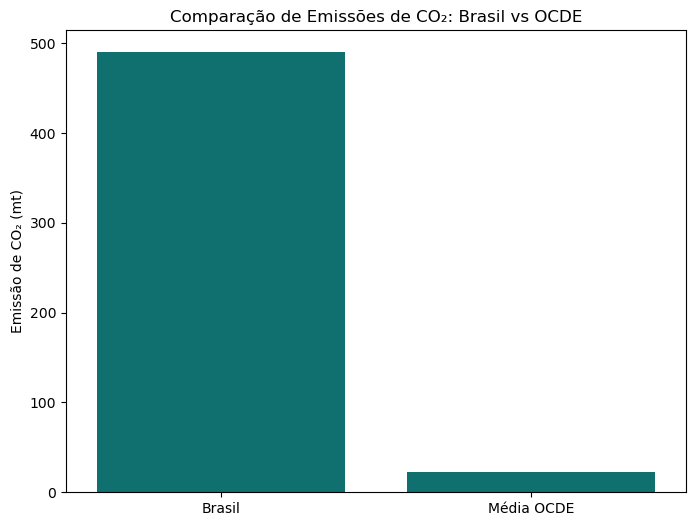

In [140]:
# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=comparacao_ocde, x='Categoria', y='Emissão de CO₂ (mt)', color='teal')  # Substituímos palette por color
plt.title('Comparação de Emissões de CO₂: Brasil vs OCDE')
plt.ylabel('Emissão de CO₂ (mt)')
plt.xlabel('')
plt.show()

Gráfico: Comparação direta das emissões de CO₂ entre Brasil e Estados Unidos.

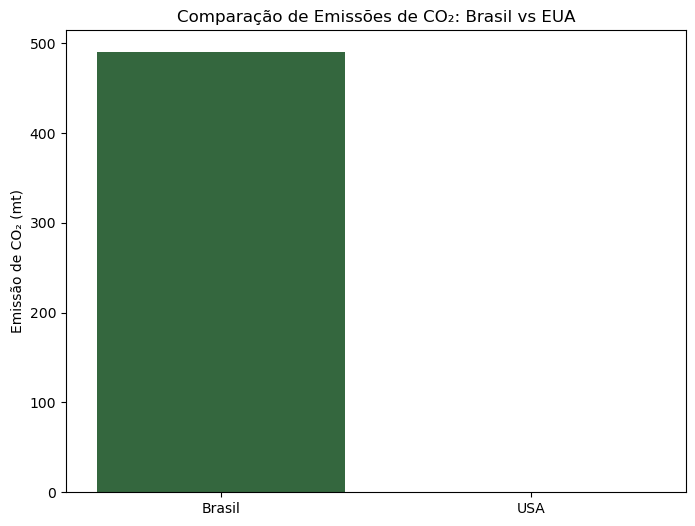

In [142]:
# Substituindo 'United States' por 'USA' e removendo espaços extras
merged['Country'] = merged['Country'].str.strip().replace('United States', 'USA')

# Verificando se os dados de 'USA' e 'Brazil' estão presentes
eua_data = merged[merged['Country'] == 'USA']
brasil_data = merged[merged['Country'] == 'Brazil']

# Verificando se os dados foram encontrados
if eua_data.empty:
    print("Não há dados para os USA no DataFrame.")
else:
    if brasil_data.empty:
        print("Não há dados para o Brasil no DataFrame.")
    else:
        brasil_emissao = brasil_data['CO2EmissionRate (mt)'].values[0]
        eua_emissao = eua_data['CO2EmissionRate (mt)'].values[0]

        # Criando os dados para o gráfico
        comparacao_eua = pd.DataFrame({
            'Categoria': ['Brasil', 'USA'],
            'Emissão de CO₂ (mt)': [brasil_emissao, eua_emissao]
        })

        # Gráfico de barras
        plt.figure(figsize=(8, 6))
        sns.barplot(data=comparacao_eua, x='Categoria', y='Emissão de CO₂ (mt)', hue='Categoria', palette='cubehelix', legend=False)
        plt.title('Comparação de Emissões de CO₂: Brasil vs EUA')
        plt.ylabel('Emissão de CO₂ (mt)')
        plt.xlabel('')
        plt.show()

Os gráficos apresentados indicam uma disparidade significativa nas emissões de CO₂ entre o Brasil e os valores médios globais, das Américas e da OCDE. Abaixo estão as conclusões para cada gráfico:

*Brasil vs. Média Global:*
* O Brasil apresenta uma emissão de CO₂ significativamente mais alta do que a média global.
- A diferença é tão grande que a barra de emissão do Brasil praticamente domina o gráfico, indicando um nível de emissão muito superior ao valor médio global.

*Brasil vs. Média das Américas:*
* De forma similar ao gráfico anterior, o Brasil possui uma emissão muito maior do que a média das Américas.
- Novamente, a barra do Brasil é substancialmente mais alta, refletindo um padrão consistente de emissões muito elevadas em comparação com a região das Américas.

*Brasil vs. Média da OCDE:*
* O Brasil também possui uma emissão de CO₂ muito superior à média da OCDE.
- A diferença é ainda mais pronunciada, com a emissão do Brasil ocupando quase toda a escala do gráfico, enquanto a média da OCDE está extremamente baixa.
Esses gráficos sugerem que o Brasil tem um impacto ambiental muito maior em termos de emissões de CO₂, em comparação com as médias global, das Américas e da OCDE. Isso pode indicar uma dependência significativa de fontes de energia mais poluentes ou outros fatores relacionados à infraestrutura e políticas ambientais.